In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from fbprophet import Prophet

In [25]:
data = pd.read_csv('data/imputed_data.csv')
data

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
0,2020-01-01 00:00:00,42.900000,0.71800,15.7,73.1,64.4
1,2020-01-01 01:00:00,33.600000,0.58700,10.1,74.8,66.0
2,2020-01-01 02:00:00,29.300000,0.20071,5.1,51.0,44.9
3,2020-01-01 03:00:00,30.500000,0.24600,7.2,27.7,25.1
4,2020-01-01 04:00:00,29.300000,0.20400,8.3,15.3,13.6
...,...,...,...,...,...,...
40986,2024-09-03 18:00:00,21.831528,0.22200,55.1,12.0,5.3
40987,2024-09-03 19:00:00,21.831528,0.24500,48.2,13.4,7.0
40988,2024-09-03 20:00:00,21.831528,0.23400,44.5,12.4,7.1
40989,2024-09-03 21:00:00,21.831528,0.22500,25.9,10.6,5.4


In [27]:
data['date'] = pd.to_datetime(data['id'])
data.set_index('date', inplace=True)

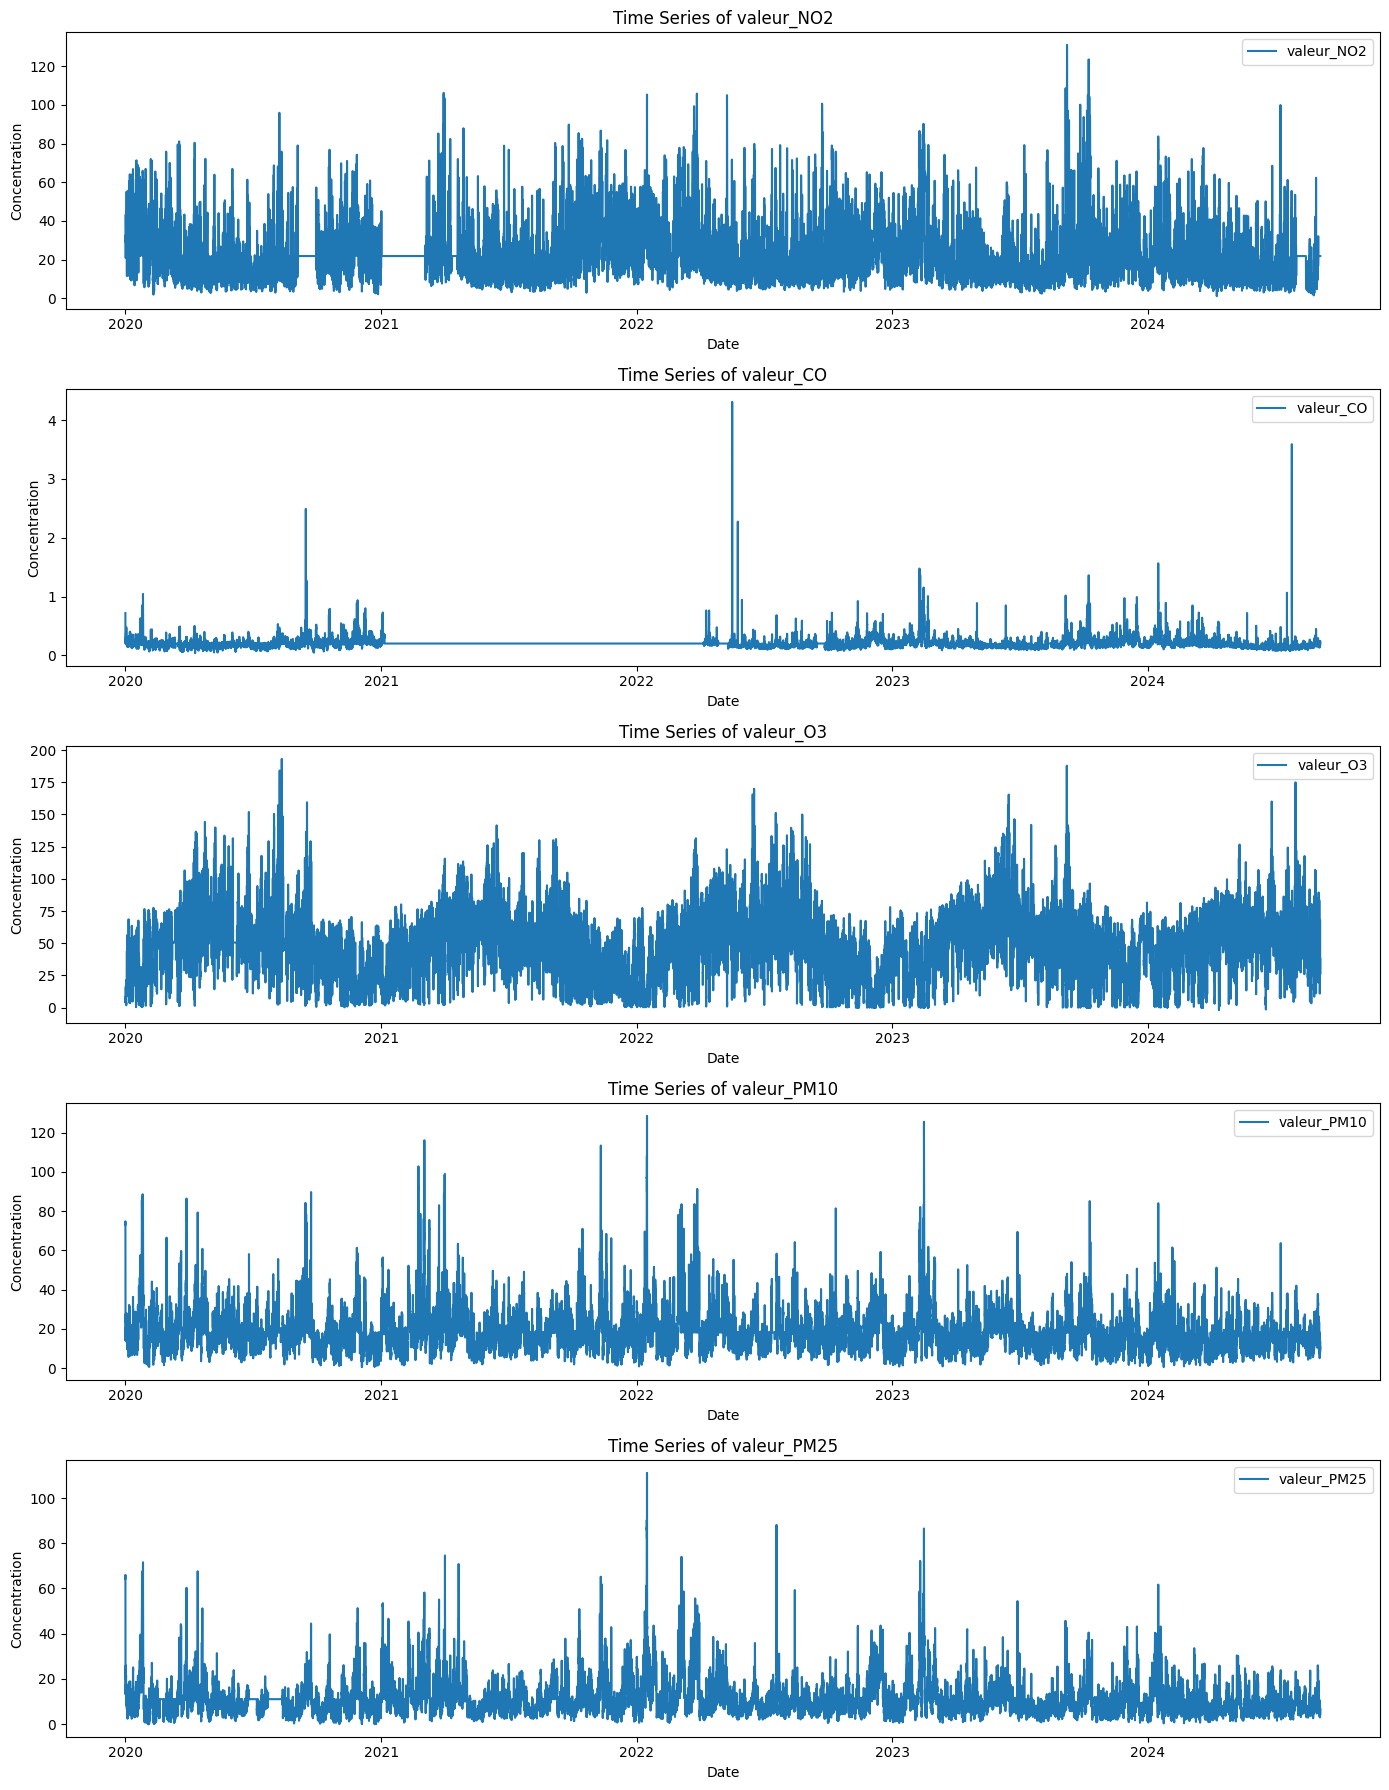

In [28]:
numeric_data = data.select_dtypes(include=['number'])

pollutants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

# original data plot
plt.figure(figsize=(14, 18))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(5, 1, i)  # 5 rows, 1 column, i-th subplot
    plt.plot(data.index, data[pollutant], label=pollutant)
    plt.title(f'Time Series of {pollutant}')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Daily data for decompsition

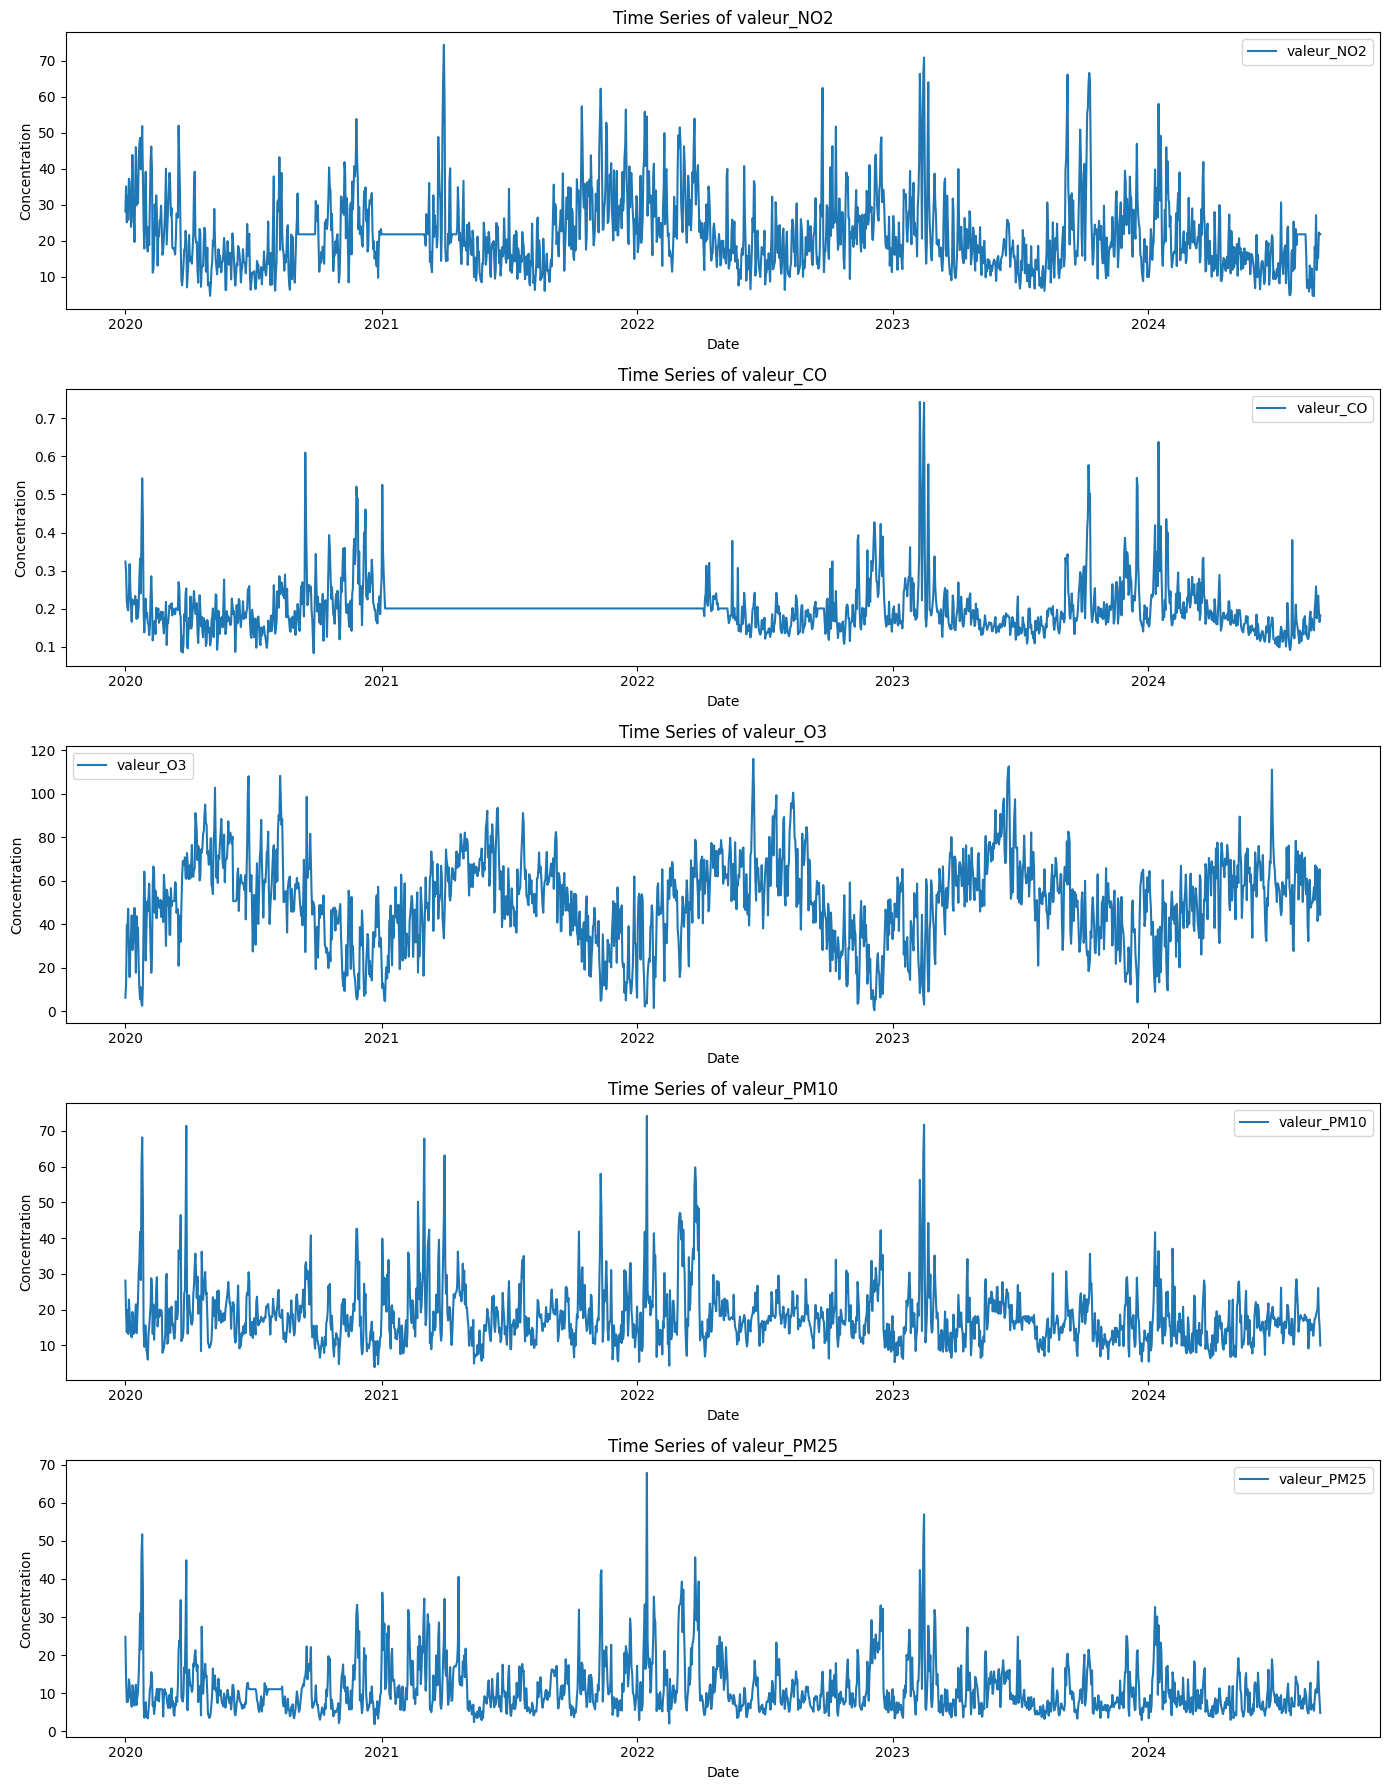

In [42]:
# Resample data to daily means
daily_data = numeric_data.resample('D').mean()
plt.figure(figsize=(14, 18))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(5, 1, i)  # 5 rows, 1 column, i-th subplot
    plt.plot(daily_data.index, daily_data[pollutant], label=pollutant)
    plt.title(f'Time Series of {pollutant}')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

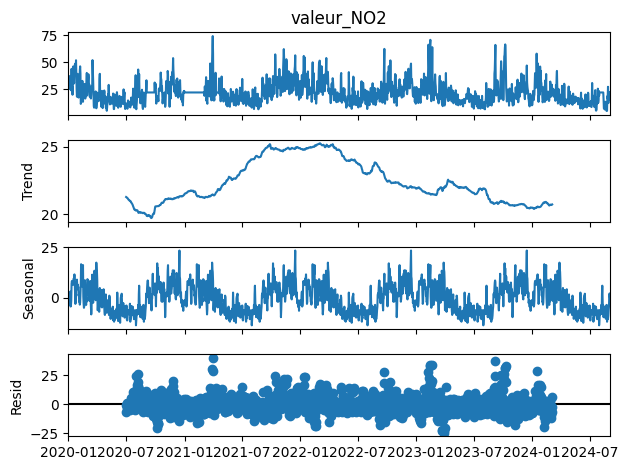

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming daily frequency
decomposition = seasonal_decompose(daily_data['valeur_NO2'], model='additive', period=365)  # Change to relevant pollutant
decomposition.plot()
plt.show()

For NO2, Summer is low, winter is high
For CO, Summer is low, winter is high
For O3, Summer is high, winter is low
For PM10,Spring is high, other seasons are relatively stable
For PM25, Spring is high, summer and fall are low, winter is second high

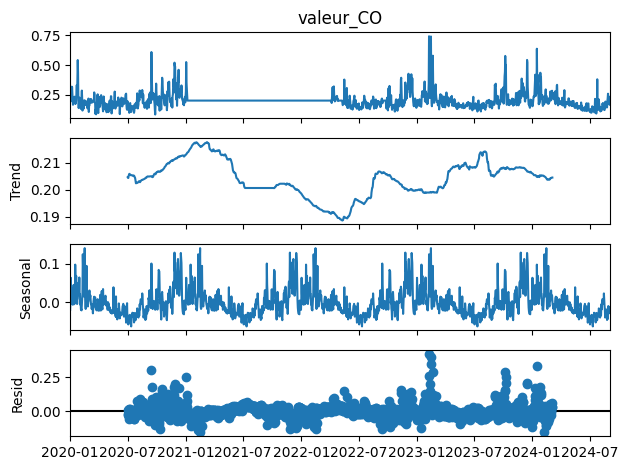

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming daily frequency
decomposition = seasonal_decompose(daily_data['valeur_CO'], model='additive', period=365)  # Change to relevant pollutant
decomposition.plot()
plt.show()

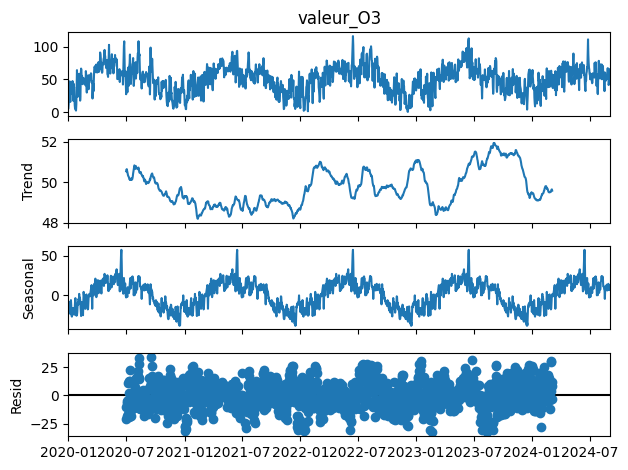

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming daily frequency
decomposition = seasonal_decompose(daily_data['valeur_O3'], model='additive', period=365)  # Change to relevant pollutant
decomposition.plot()
plt.show()

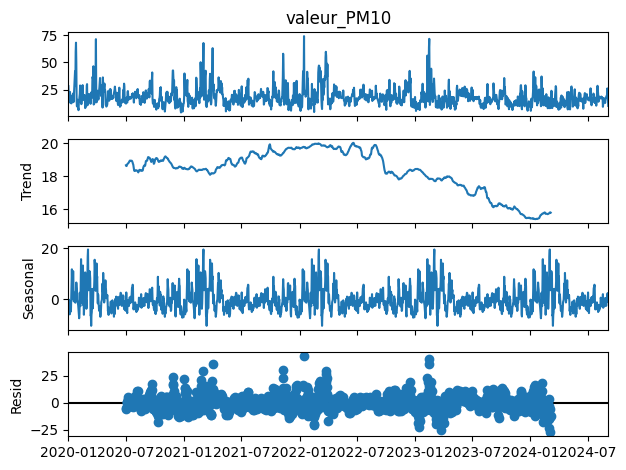

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming daily frequency
decomposition = seasonal_decompose(daily_data['valeur_PM10'], model='additive', period=365)  # Change to relevant pollutant
decomposition.plot()
plt.show()

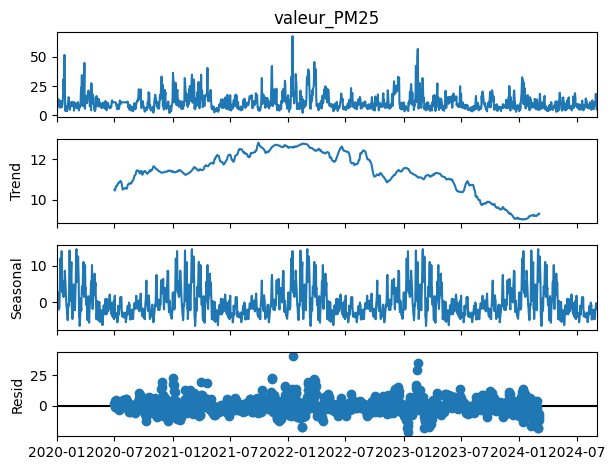

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming daily frequency
decomposition = seasonal_decompose(daily_data['valeur_PM25'], model='additive', period=365)  # Change to relevant pollutant
decomposition.plot()
plt.show()

## Weekly data for decompsition

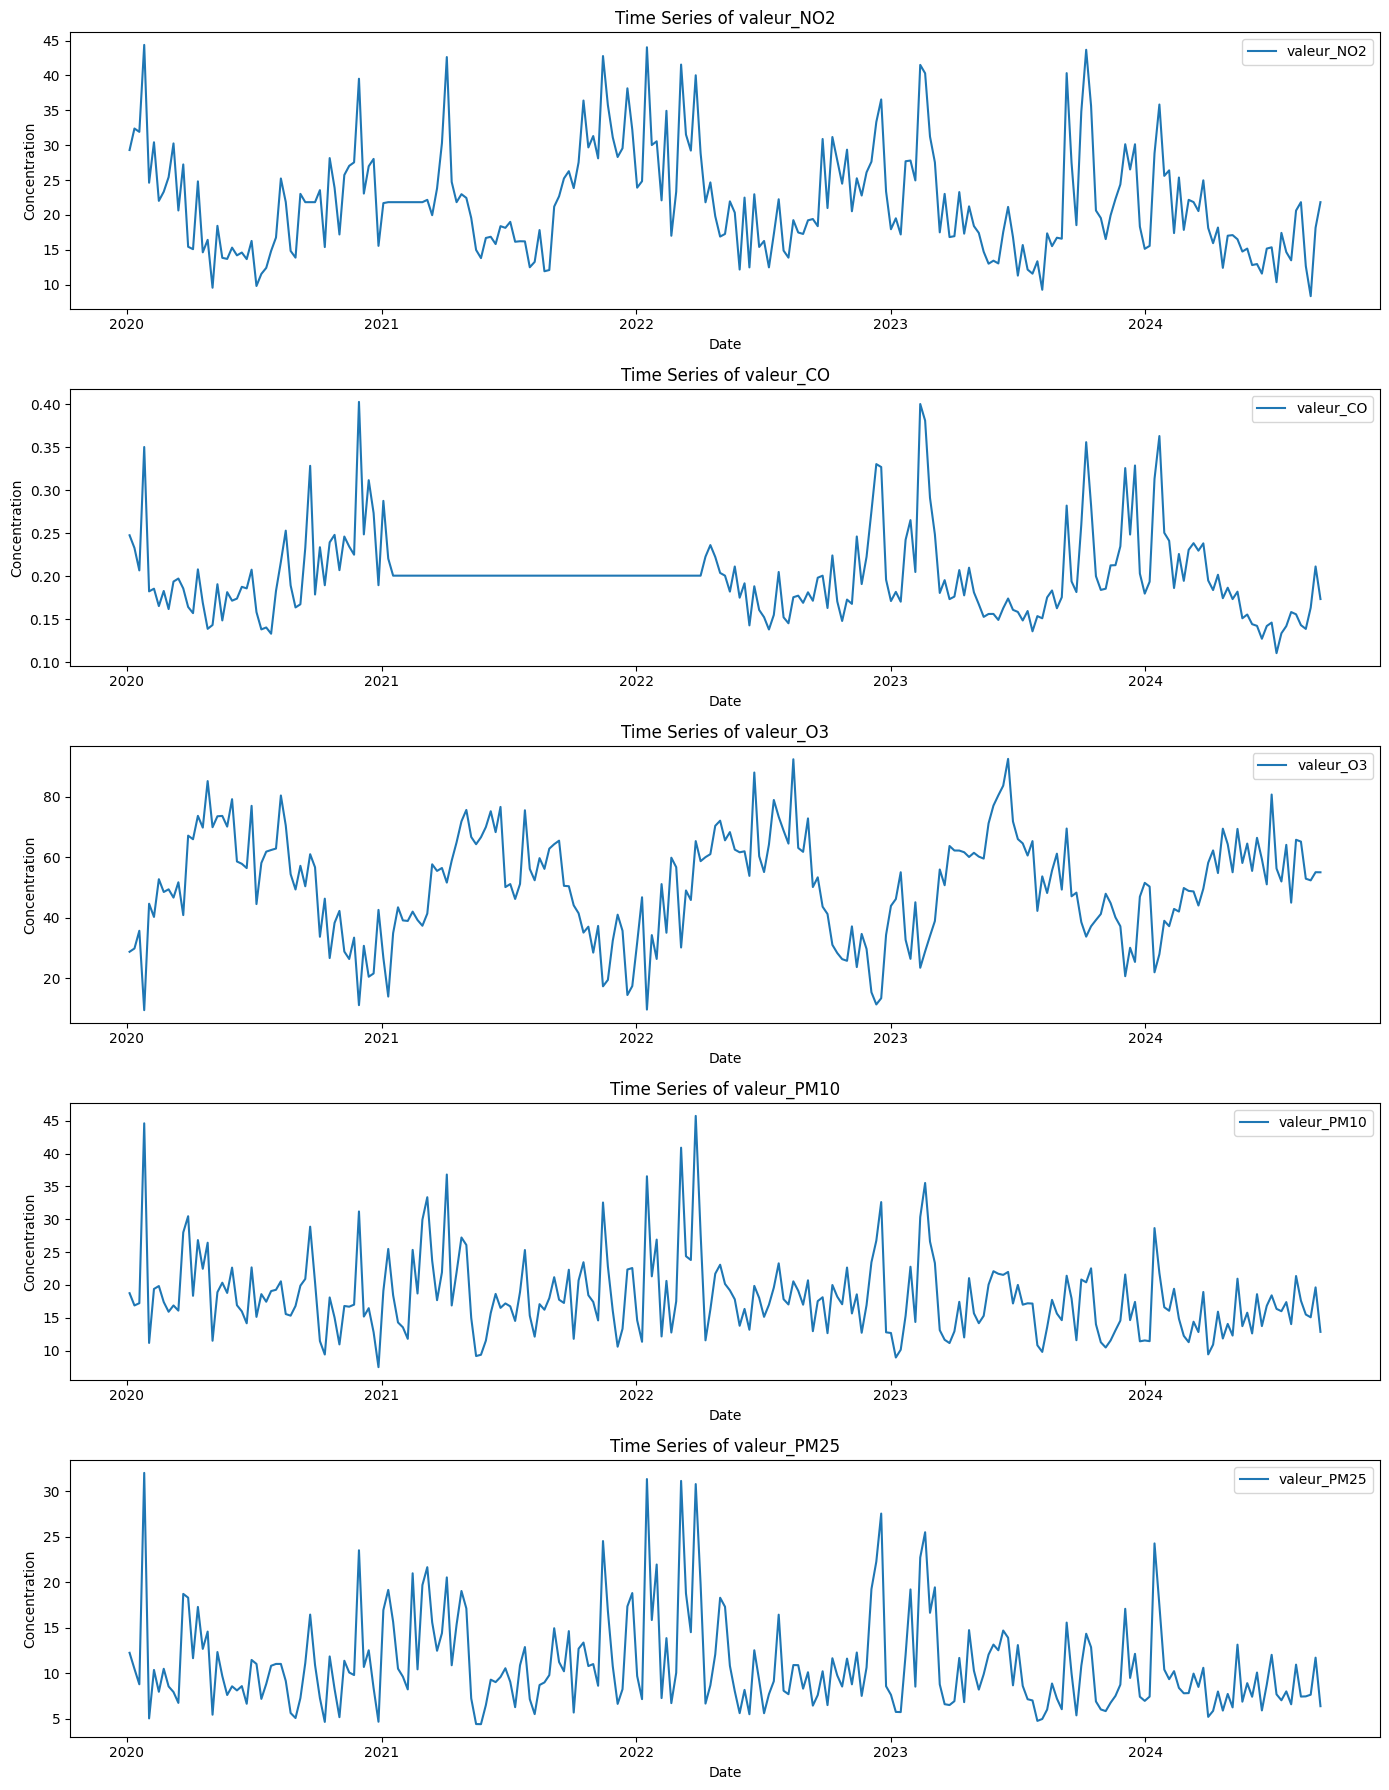

In [49]:
# Resample data to daily means
weekly_data = numeric_data.resample('W').mean()
plt.figure(figsize=(14, 18))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(5, 1, i)  # 5 rows, 1 column, i-th subplot
    plt.plot(weekly_data.index, weekly_data[pollutant], label=pollutant)
    plt.title(f'Time Series of {pollutant}')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

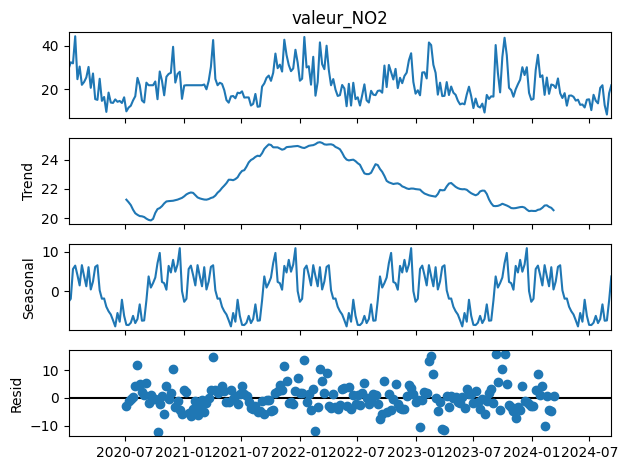

In [54]:
# Assuming daily frequency
decomposition = seasonal_decompose(weekly_data['valeur_NO2'], model='additive', period=52)  # Change to relevant pollutant
decomposition.plot()
plt.show()

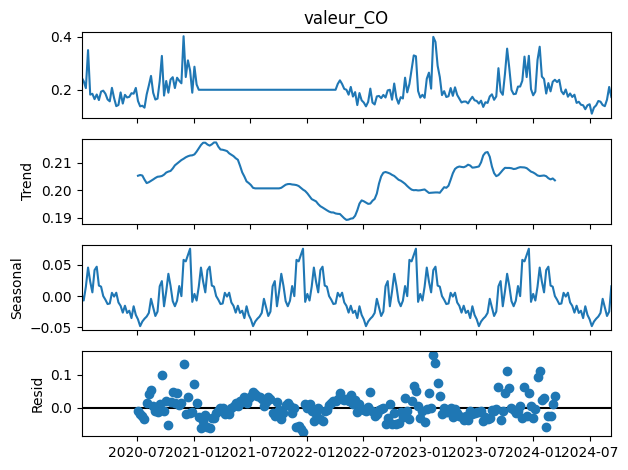

In [55]:
# Assuming daily frequency
decomposition = seasonal_decompose(weekly_data['valeur_CO'], model='additive', period=52)  # Change to relevant pollutant
decomposition.plot()
plt.show()

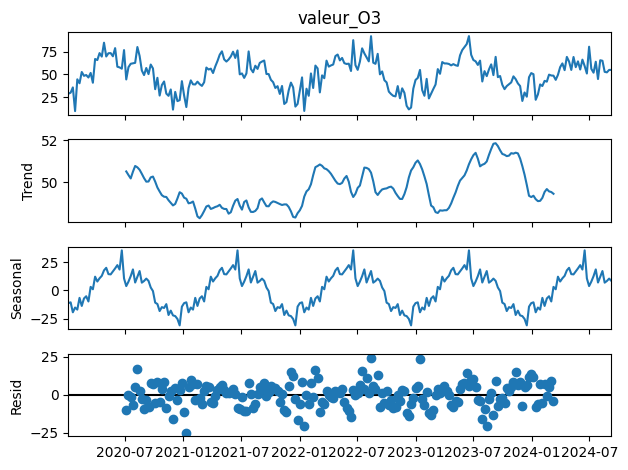

In [56]:
# Assuming daily frequency
decomposition = seasonal_decompose(weekly_data['valeur_O3'], model='additive', period=52)  # Change to relevant pollutant
decomposition.plot()
plt.show()

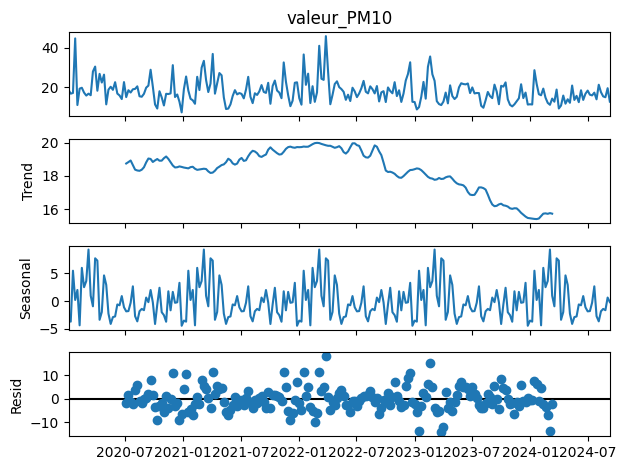

In [58]:
# Assuming daily frequency
decomposition = seasonal_decompose(weekly_data['valeur_PM10'], model='additive', period=52)  # Change to relevant pollutant
decomposition.plot()
plt.show()

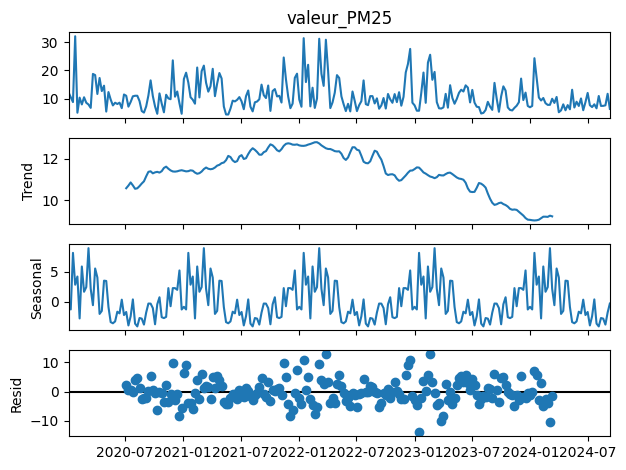

In [59]:
# Assuming daily frequency
decomposition = seasonal_decompose(weekly_data['valeur_PM25'], model='additive', period=52)  # Change to relevant pollutant
decomposition.plot()
plt.show()

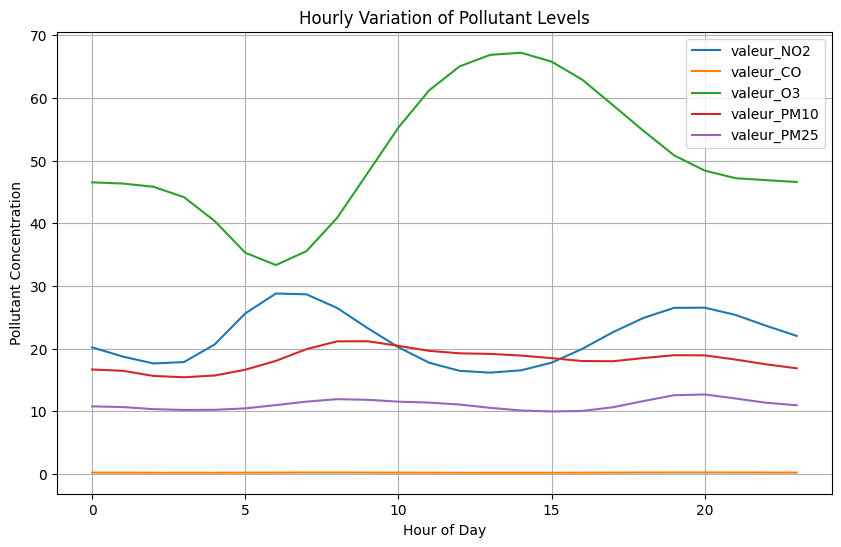

In [69]:
import matplotlib.pyplot as plt

numeric_data['hour'] = numeric_data.index.hour

hourly_avg = numeric_data.groupby('hour').mean()

plt.figure(figsize=(10, 6))

pollutants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']
for pollutant in pollutants:
    plt.plot(hourly_avg.index, hourly_avg[pollutant], label=pollutant)

plt.title('Hourly Variation of Pollutant Levels')
plt.xlabel('Hour of Day')
plt.ylabel('Pollutant Concentration')
plt.legend()
plt.grid()
plt.show()


## Autocorrelation Analysis

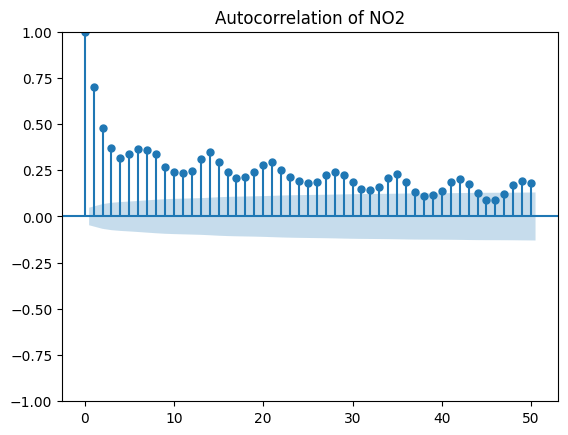

In [70]:
# Autocorrelation Plot
plot_acf(daily_data['valeur_NO2'].dropna(), lags=50)  # Change to relevant pollutant
plt.title('Autocorrelation of NO2')
plt.show()

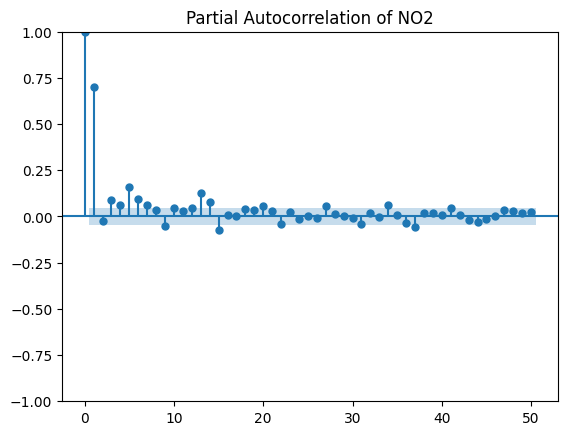

In [72]:
plot_pacf(daily_data['valeur_NO2'].dropna(), lags=50)  # Change to relevant pollutant
plt.title('Partial Autocorrelation of NO2')
plt.show()

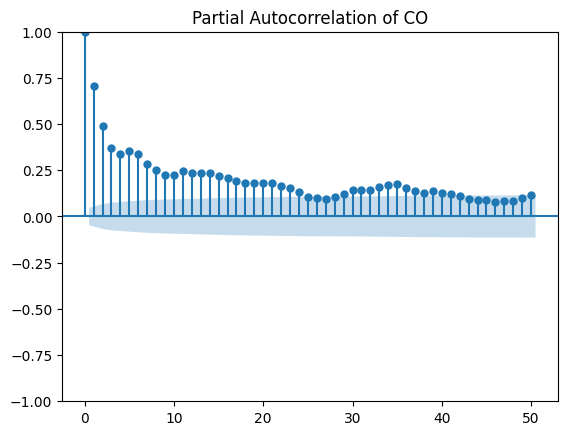

In [75]:
plot_acf(daily_data['valeur_CO'].dropna(), lags=50)  # Change to relevant pollutant
plt.title('Partial Autocorrelation of CO')
plt.show()

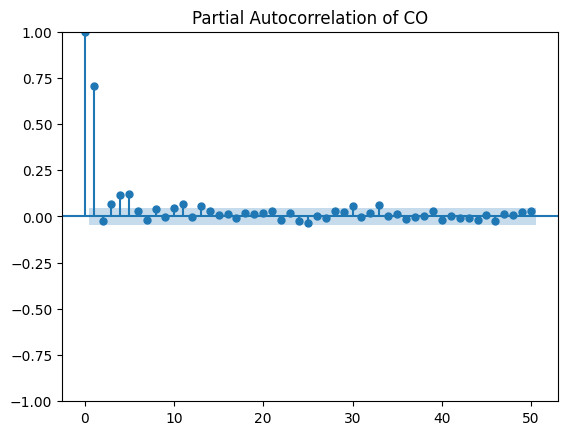

In [73]:
plot_pacf(daily_data['valeur_CO'].dropna(), lags=50)  # Change to relevant pollutant
plt.title('Partial Autocorrelation of CO')
plt.show()

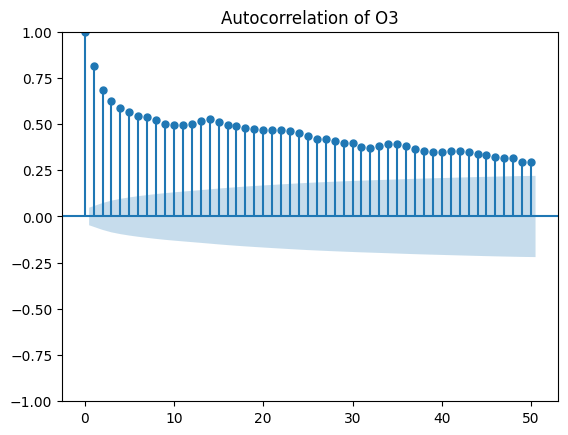

In [76]:
plot_acf(daily_data['valeur_O3'].dropna(), lags=50)  # Change to relevant pollutant
plt.title('Autocorrelation of O3')
plt.show()

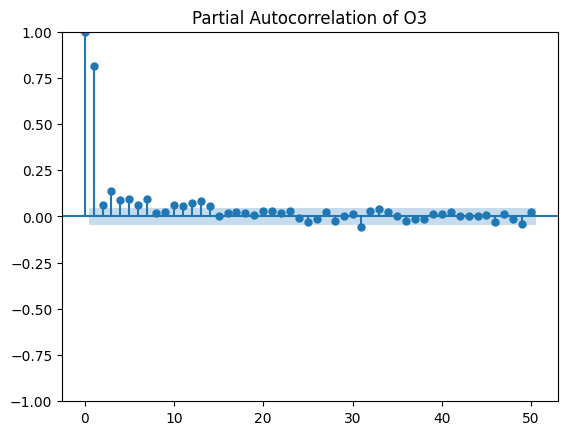

In [77]:
plot_pacf(daily_data['valeur_O3'].dropna(), lags=50)  # Change to relevant pollutant
plt.title('Partial Autocorrelation of O3')
plt.show()

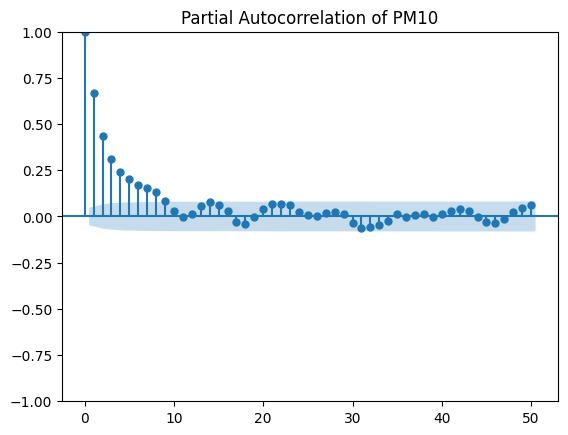

In [79]:
plot_acf(daily_data['valeur_PM10'].dropna(), lags=50)  # Change to relevant pollutant
plt.title('Partial Autocorrelation of PM10')
plt.show()

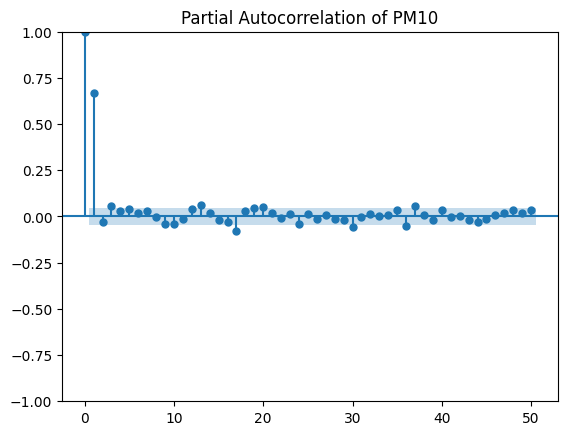

In [80]:
plot_pacf(daily_data['valeur_PM10'].dropna(), lags=50)  # Change to relevant pollutant
plt.title('Partial Autocorrelation of PM10')
plt.show()

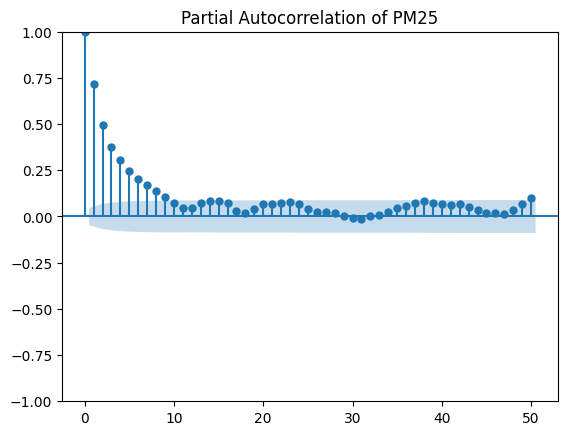

In [82]:
plot_acf(daily_data['valeur_PM25'].dropna(), lags=50)  # Change to relevant pollutant
plt.title('Partial Autocorrelation of PM25')
plt.show()

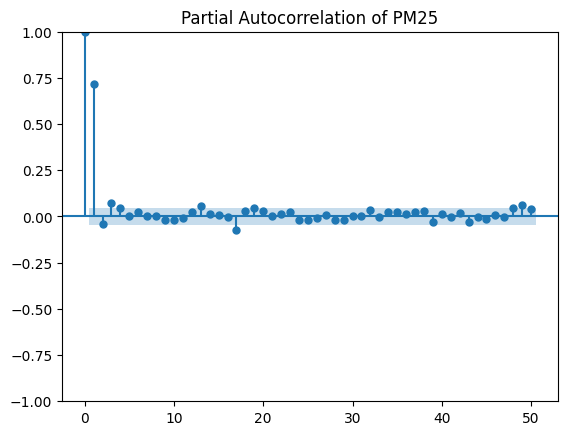

In [81]:
plot_pacf(daily_data['valeur_PM25'].dropna(), lags=50)  # Change to relevant pollutant
plt.title('Partial Autocorrelation of PM25')
plt.show()